<h4>ChatGPT Internal Source Consistency Analysis</h4>
<p>
This notebook evaluates ChatGPT’s internal consistency in source citation behavior. Each query was executed three independent times using the ChatGPT web interface. Each query thus contributes three independent source lists.
</p>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df
from metrics import syntactic_overlap
from plots import boxplot

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,sources_all,domains_cited,domains_additional,domains_all,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, forbes.com], [tomsguide.com],...","[[reddit.com, tomsguide.com, techrepublic.com,...","[[tomsguide.com, forbes.com, reddit.com, techr...","[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,[[https://www.tomsguide.com/best-picks/best-ph...,"[[tomsguide.com, phonearena.com, wired.com], [...","[[reddit.com, theverge.com, techadvisor.com, w...","[[tomsguide.com, phonearena.com, wired.com, re...","[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,[[https://www.techradar.com/news/best-cameraph...,"[[tomsguide.com, techradar.com], [abdgadgets.c...","[[reddit.com, tomsguide.com, stuff.tv, techadv...","[[tomsguide.com, techradar.com, reddit.com, st...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,[[https://www.androidcentral.com/phones/oneplu...,"[[androidcentral.com, tomsguide.com, phonearen...","[[tomsguide.com, wired.com, co.uk, 9to5google....","[[androidcentral.com, tomsguide.com, phonearen...","[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,[[https://www.pcworld.com/article/436674/best-...,"[[windowscentral.com, rtings.com, pcworld.com,...","[[reddit.com, bestbuy.com, windowscentral.com,...","[[windowscentral.com, rtings.com, pcworld.com,...","[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, wired.com], [tomshardware....","[[reddit.com, tomshardware.com, pcworld.com, y...","[[tomshardware.com, wired.com, reddit.com, pcw...","[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,[[https://www.tomshardware.com/best-picks/best...,"[[tomshardware.com, techradar.com], [tomshardw...","[[reddit.com, tomsguide.com, tomshardware.com,...","[[tomshardware.com, techradar.com, reddit.com,...","[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.ultrabookreview.com/2071-best-

<h4>Mean Internal Source Overlap - Definition & Implementation</h4> 
<p>To evaluate how consistent ChatGPT is in the sources it cites across multiple runs of the same query, we define the Mean Internal Source Overlap (MISO). This metric captures, on average, how much the sets of retrieved or cited sources overlap syntactically between runs, providing a way to measure the stability of ChatGPT’s information retrieval process.</p>

<p>
Formally, let \( C = \{(i, j) \mid 1 \le i < j \le |S_{GPT_q}|\} \) denote the set of all unique pairs of source lists for query \( q \), such that \( |C| = \binom{|S_{GPT_q}|}{2} \). 
Then, the Mean Internal Source Overlap is defined as:
</p> 

<p style="text-align:center;"> 
\( MISO(q) = \frac{1}{|C|} \sum_{(i, j) \in C} O_{\text{syntactic}}(s_{qi}, s_{qj}) \) 
</p> 

<p>
where \( O_{\text{syntactic}}(s_{qi}, s_{qj}) \) represents the syntactic overlap between the two source lists \( s_{qi} \) and \( s_{qj} \). This coefficient captures the proportion of shared sources relative to the smaller of the two lists, making it robust to list length differences. Higher MISO values indicate greater internal consistency in ChatGPT’s source selection, reflecting stable retrieval behavior across independent runs of the same query.
</p>

In [3]:
def calc_miso(chatgpt_df, chatgpt_sources):
    from itertools import combinations
    
    mipo_results = []

    for _, row in chatgpt_df.iterrows():
        row_list = row[chatgpt_sources]
        pairwise_scores = []

        for c in combinations(row_list, 2):
            score = syntactic_overlap(c[0], c[1])
            pairwise_scores.append(score)

        syntactic_mean = np.mean(pairwise_scores)
        syntactic_var = np.var(pairwise_scores, ddof = 0)
        syntactic_std = np.sqrt(syntactic_var)

        mipo_results.append({
            "query": row["query"],
            "product": row["product"],
            "market_type": row["market_type"],
            "query_level": row["query_level"],
            "miso_mean": syntactic_mean,
            "miso_var": syntactic_var,
            "miso_std": syntactic_std
        })

    return pd.DataFrame(mipo_results)

<h4>Mean Internal Source Overlap - Cited Sources Analysis</h4>

In [4]:
miso_df_cs = calc_miso(chatgpt_df, chatgpt_sources = "sources_cited")
miso_df_cs

,query,product,market_type,query_level,miso_mean,miso_var,miso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,1.000000,0.000000,0.000000
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.250000,0.125000,0.353553
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.333333,0.222222,0.471405
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000,0.000000
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.666667,0.000000,0.000000
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.500000,0.000000,0.000000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.833333,0.055556,0.235702
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.166667,0.055556,0.235702
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.666667,0.013889,0.117851
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,1.000000,0.000000,0.000000


<h4>Mean Internal Source Overlap - Analysis (Sources Cited in Response)</h4>

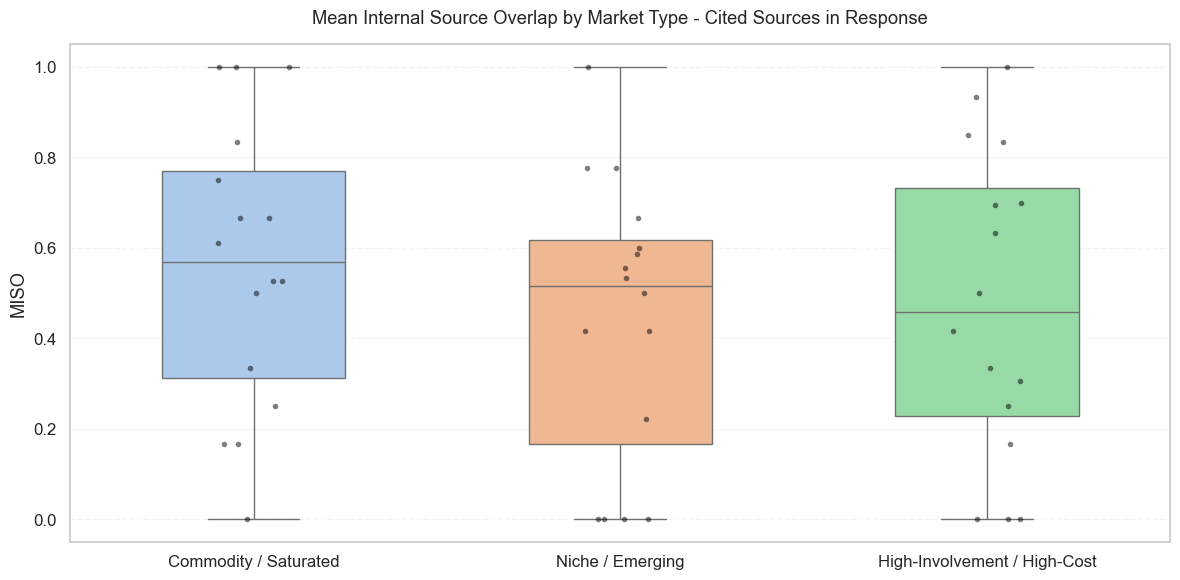

In [5]:
miso_cs_cs = miso_df_cs[miso_df_cs["market_type"] == "Commodity / Saturated"]
miso_ne_cs = miso_df_cs[miso_df_cs["market_type"] == "Niche / Emerging"]
miso_hh_cs = miso_df_cs[miso_df_cs["market_type"] == "High-Involvement / High-Cost"]

plot_df_cs = pd.DataFrame({
    "MISO": pd.concat([
        miso_cs_cs["miso_mean"],
        miso_ne_cs["miso_mean"],
        miso_hh_cs["miso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(miso_cs_cs)
        + ["Niche / Emerging"] * len(miso_ne_cs)
        + ["High-Involvement / High-Cost"] * len(miso_hh_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Market Type",
    y_col = "MISO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Mean Internal Source Overlap by Market Type - Cited Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>Cited-Source Consistency by Market Type</h4> <p>The boxplots compare the overlap of <em>cited sources in the ChatGPT response</em> across repeated runs, by market type. Commodity/Saturated shows a slightly higher median overlap than Niche/Emerging and High-Involvement/High-Cost, but all groups have wide dispersion, including near-zero and near-one runs.</p> <ul> <li>Commodity markets concentrate authority and stable head domains, so the same sources reappear more often.</li> <li>Niche/emerging topics fragment authority and change quickly; freshness and thinner coverage lower repeated citation overlap.</li> <li>High-involvement queries mix reviews, spec sheets, and retailers; broader vertical intent dilutes reuse of the same sources.</li> <li>Variation reflects SERP competition and LLM citation assembly (coverage, deduplication choices) across runs.</li> </ul> 

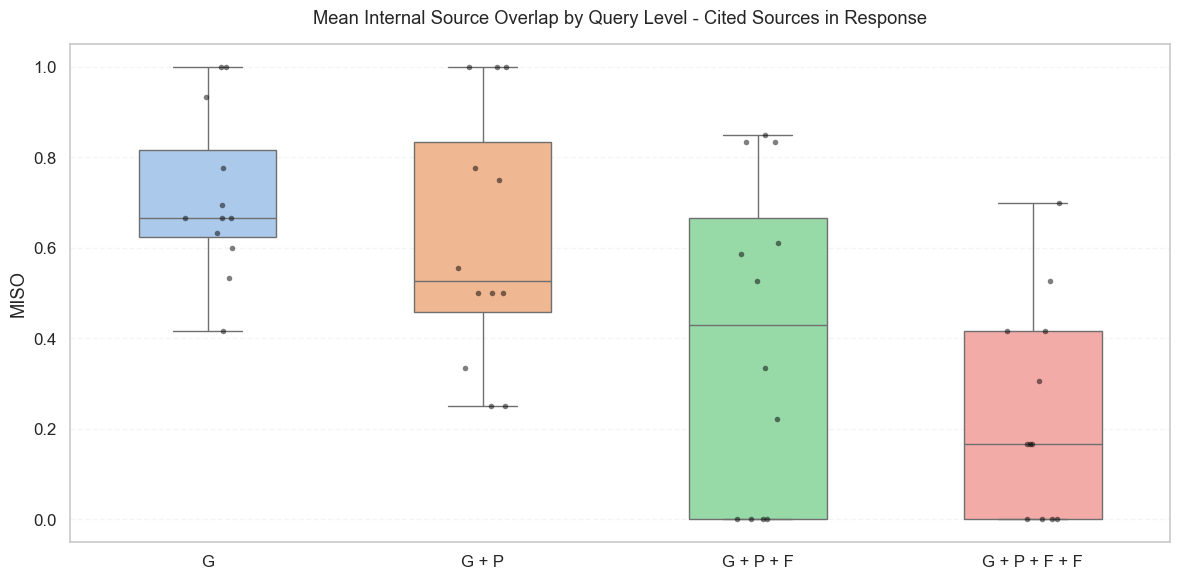

In [6]:
miso_g_cs = miso_df_cs[miso_df_cs["query_level"] == "General"]
miso_gp_cs = miso_df_cs[miso_df_cs["query_level"] == "General & Price"]
miso_gpf_cs = miso_df_cs[miso_df_cs["query_level"] == "General & Price & Feature"]
miso_gpff_cs = miso_df_cs[miso_df_cs["query_level"] == "General & Price & Feature & Feature"]

plot_df_cs = pd.DataFrame({
    "MISO": pd.concat([
        miso_g_cs["miso_mean"],
        miso_gp_cs["miso_mean"],
        miso_gpf_cs["miso_mean"],
        miso_gpff_cs["miso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(miso_g_cs)
        + ["G + P"] * len(miso_gp_cs)
        + ["G + P + F"] * len(miso_gpf_cs)
        + ["G + P + F + F"] * len(miso_gpff_cs)
    )
})

boxplot(
    df = plot_df_cs,
    x_col = "Query Level",
    y_col = "MISO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Mean Internal Source Overlap by Query Level - Cited Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>Cited-Source Consistency by Query Level (G → G+P → G+P+F → G+P+F+F)</h4> <p>The boxplots compare overlap of <em>cited sources in the ChatGPT response</em> as constraints increase. Generic queries have the highest median overlap; adding product, features, and further filters reduces the median and increases variance, with many zero-overlap runs at the most constrained levels.</p> <ul> <li>At G, stable high-authority pages dominate, so retrieval reuses the same sources.</li> <li>Adding constraints narrows candidate sets and raises sensitivity to freshness and variant pages, swapping which sources are cited.</li> <li>Under G+P+F(+F), vertical intent (retailer vs review vs spec) and strict filters outweigh source reuse, lowering overlap.</li> <li>LLM behaviors—constraint satisfaction, source coverage, and deduplication—magnify small retrieval differences into different citation sets.</li> </ul>

<h4>Mean Internal Source Overlap - All Sources Analyis</h4>

In [7]:
miso_df_as = calc_miso(chatgpt_df, chatgpt_sources = "sources_all")
miso_df_as

,query,product,market_type,query_level,miso_mean,miso_var,miso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.933333,0.002222,0.047140
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.788235,0.012129,0.110130
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.827778,0.003025,0.054997
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.733333,0.035556,0.188562
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.848485,0.001837,0.042855
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.358586,0.040455,0.201134
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.941919,0.001696,0.041186
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.361111,0.145247,0.381113
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.866667,0.035556,0.188562
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.777778,0.024691,0.157135


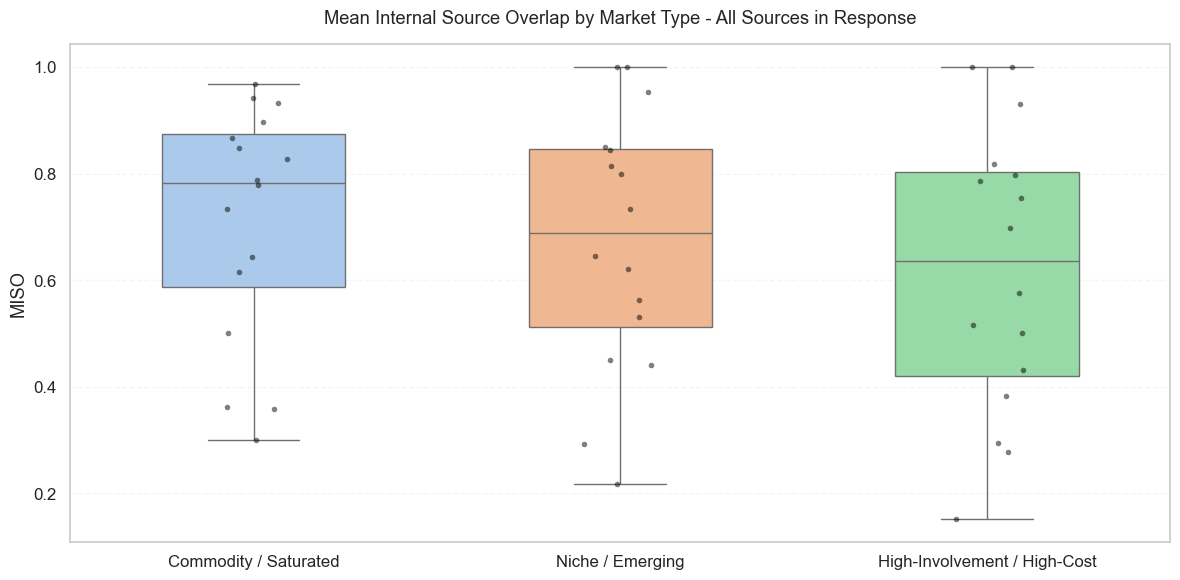

In [11]:
miso_cs_as = miso_df_as[miso_df_as["market_type"] == "Commodity / Saturated"]
miso_ne_as = miso_df_as[miso_df_as["market_type"] == "Niche / Emerging"]
miso_hh_as = miso_df_as[miso_df_as["market_type"] == "High-Involvement / High-Cost"]

plot_df_as = pd.DataFrame({
    "MISO": pd.concat([
        miso_cs_as["miso_mean"],
        miso_ne_as["miso_mean"],
        miso_hh_as["miso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(miso_cs_as)
        + ["Niche / Emerging"] * len(miso_ne_as)
        + ["High-Involvement / High-Cost"] * len(miso_hh_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Market Type",
    y_col = "MISO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Mean Internal Source Overlap by Market Type - All Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>All-Source Consistency by Market Type</h4> <p>The boxplots compare ChatGPT’s <em>Mean Internal Source Overlap (MISO)</em> when considering <em>all sources mentioned in its responses</em>(both cited and uncited) across market types. Commodity/Saturated queries show the highest median overlap, followed by Niche/Emerging and High-Involvement/High-Cost, though all exhibit moderate dispersion.</p> <ul> <li>Commodity markets rely on stable, high-authority domains repeatedly surfaced in retrieval, producing strong internal overlap across runs.</li> <li>Niche markets involve smaller and more volatile source pools; variation in retrieval and synthesis reduces consistency in total sources used.</li> <li>High-involvement categories draw from heterogeneous verticals (reviews, retailers, forums), so ChatGPT samples more diverse inputs and overlaps less.</li> <li>Differences mainly reflect market concentration and SERP stability, not generation randomness—ChatGPT’s retrieval layer is more consistent where authority and intent signals dominate.</li> </ul>

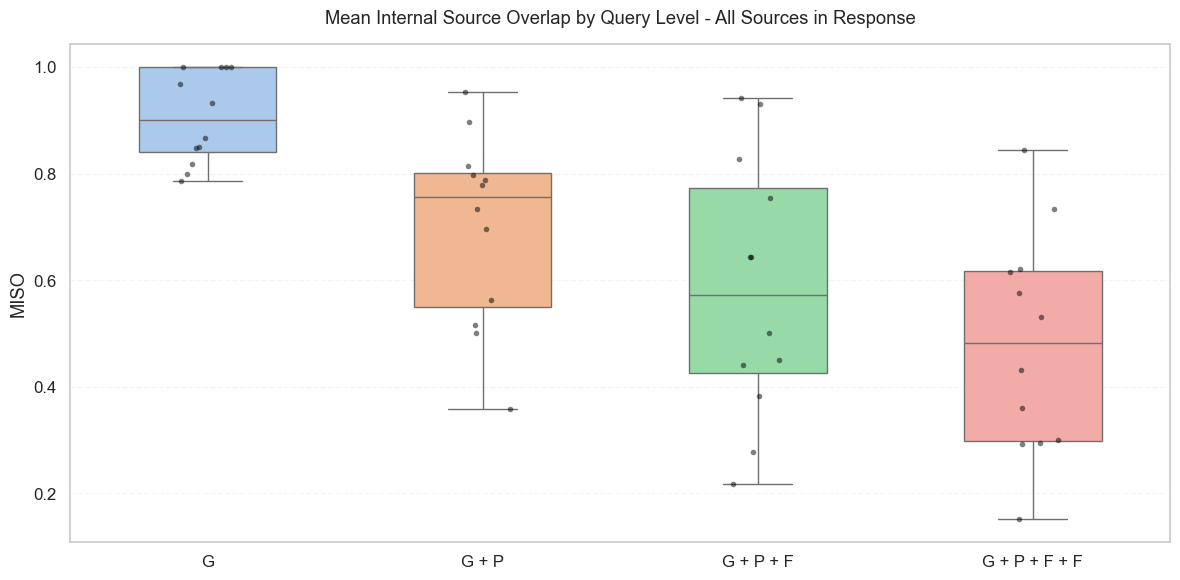

In [10]:
miso_g_as = miso_df_as[miso_df_as["query_level"] == "General"]
miso_gp_as = miso_df_as[miso_df_as["query_level"] == "General & Price"]
miso_gpf_as = miso_df_as[miso_df_as["query_level"] == "General & Price & Feature"]
miso_gpff_as = miso_df_as[miso_df_as["query_level"] == "General & Price & Feature & Feature"]

plot_df_as = pd.DataFrame({
    "MISO": pd.concat([
        miso_g_as["miso_mean"],
        miso_gp_as["miso_mean"],
        miso_gpf_as["miso_mean"],
        miso_gpff_as["miso_mean"]
    ], ignore_index = True),
    "Query Level": (
        ["G"] * len(miso_g_as)
        + ["G + P"] * len(miso_gp_as)
        + ["G + P + F"] * len(miso_gpf_as)
        + ["G + P + F + F"] * len(miso_gpff_as)
    )
})

boxplot(
    df = plot_df_as,
    x_col = "Query Level",
    y_col = "MISO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Mean Internal Source Overlap by Query Level - All Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>All-Source Consistency by Query Level (G → G+P → G+P+F → G+P+F+F)</h4> <p>The boxplots compare overlap in <em>all sources within ChatGPT’s responses</em> as queries grow more constrained. Overlap declines steadily from generic to highly filtered prompts, with narrower interquartile ranges at the simplest level and greater spread at the most complex.</p> <ul> <li>Generic (G) prompts favor well-established authority pages, giving highly stable source sets across runs.</li> <li>Adding product and feature constraints (G+P, G+P+F) increases retrieval variability; ChatGPT must balance coverage and constraint satisfaction, yielding different auxiliary sources.</li> <li>At G+P+F+F, strong filtering limits candidate pages and shifts vertical focus, reducing both citation and non-citation overlap.</li> <li>This pattern reflects ChatGPT’s extraction sensitivity—tight constraints amplify small SERP or parsing differences into broader source turnover.</li> </ul>